In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import random

import pandas as pd
import random

import matplotlib.pyplot as plt

def gen_rand_date():
    year = random.randint(2010, 2018)
    month = random.randint(1, 12)
    day = random.randint(1, 28)
    
    return pd.to_datetime('%s-%s-%s' % (year, month, day))

random.seed(4)
n_events = random.randint(20, 50)

data = pd.DataFrame({
    "feature": [random.randint(1, 10) for x in range(n_events)],
    "flag_special_event": [random.randint(1, 10) == 4 for x in range(n_events)],
    "event_type": [random.randint(0, 312) % 4 for x in range(n_events)],
    "date": [gen_rand_date() for _ in range(n_events)]
})


event_colors = {
    0: '#ffc50f',
    1: '#f3452c',
    2: '#80cacc',
    3: '#8c9f0f',
    4: '#8060cb'}

data['event_color'] = data['event_type'].apply(
    lambda x: event_colors[x]).tolist()

data = data[['date', 'event_type', 'event_color', 'feature', 'flag_special_event']]
data.head(10)

,date,event_type,event_color,feature,flag_special_event
0,2015-02-27,2,#80cacc,5,False
1,2010-12-08,3,#8c9f0f,2,False
2,2014-10-20,0,#ffc50f,7,False
3,2013-02-11,0,#ffc50f,8,False
4,2012-05-15,2,#80cacc,3,False
5,2010-01-12,1,#f3452c,2,False
6,2011-05-24,3,#8c9f0f,2,False
7,2015-01-11,0,#ffc50f,1,True
8,2014-06-05,3,#8c9f0f,7,False
9,2016-10-22,1,#f3452c,9,True


# Create the legend, plot time/feature line, style x/y axis

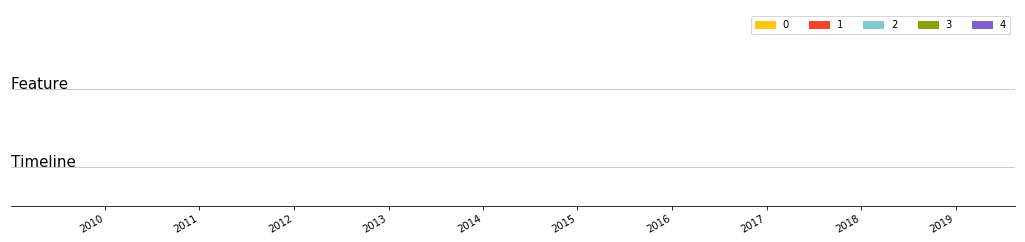

In [3]:
fig, ax = plt.subplots(1, 1)

handles = []
for label, color in event_colors.items():
    handle = mpatches.Patch(
        color=color, 
        label=str(label))

    handles.append(handle)
    
ax.legend(
    handles=handles, 
    ncol=len(handles))

#Stile ticks
fig.autofmt_xdate()
fig.set_size_inches(18, 5)

#Hide y axis 
ax.yaxis.set_visible(False)
ax.get_yaxis().set_ticklabels([])

#Hide spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#
#ax.xaxis.set_ticks_position('bottom')

#Leave left/right marging on x-axis
min_date = data['date'].min()
max_date = data['date'].max()
month_offset = pd.DateOffset(months=12)
ax.set_xlim(min_date - month_offset, max_date + month_offset)

#Limit y-range
ax.set_ylim(.9, 1.4);

#Time line
timeline_y = 1
ax.axhline(
    timeline_y,
    linewidth=1,
    color='#CCCCCC')
ax.annotate(
    'Timeline', 
    (min_date - month_offset, timeline_y),
    fontsize=15)
fig

#Feature line
feature_line_y = 1.2
ax.axhline(
    feature_line_y, 
    linewidth=1,
    c='#CCCCCC')

ax.annotate(
    'Feature', 
    (min_date - month_offset, feature_line_y),
    fontsize=15)

fig.set_size_inches(18, 4)

# Plot events
- Event type is denoted by a color
- Special event is denoted by the size of the disk
- X-axis are dates
- Y-axis is dummy (set 1 to all items)

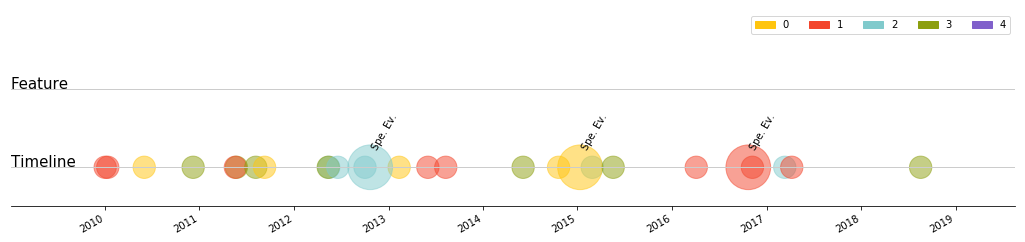

In [4]:
dot_size = 500
dot_special_scale = 2

s = (
    data['flag_special_event'].astype(int) + 1
) ** dot_special_scale * dot_size

ax.scatter(
    data['date'].tolist(),
    [1] * data.shape[0],
    c=data['event_color'].tolist(),
    s=s,
    marker='o',
    linewidth=1,
    alpha=.5)

for idx, row_data in data.iterrows():
    if row_data['flag_special_event'] == True:
        ax.annotate(
            'Spe. Ev.', 
            (row_data['date'], 1.12),
            rotation=60)
#fig.set_size_inches(18, 4)
fig

## Plot feature

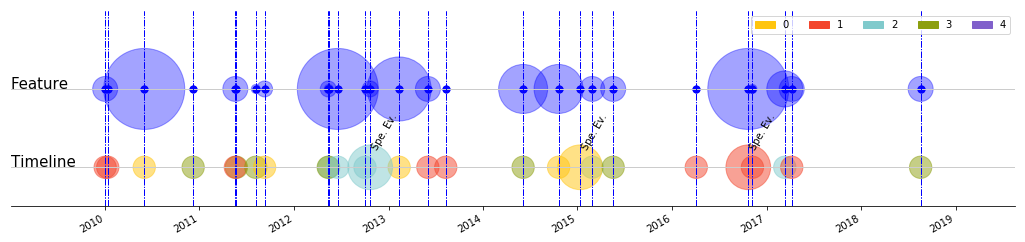

In [6]:
ax.scatter(
    data['date'].values,
    [feature_line_y] * data.shape[0],
    c='b',
    alpha=.2,
    s=data['feature'].values ** 4)

ax.scatter(
    data['date'].values,
    [feature_line_y] * data.shape[0],
    c='b',
    alpha=.8,
    s=50)


for idx, row_data in data.iterrows():
    ax.axvline(
        row_data['date'], 
        linewidth=1,
        c='b',
        linestyle='-.')
    
#fig.set_size_inches(18, 4)
fig.savefig('timeline.png', format='png')
fig